# OUTDATED, the examples moved to the manual
## See https://empymod.readthedocs.io/en/stable/examples

----

# Frequency domain example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
# Plot-style adjustments
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

## Define models

In [3]:
name = 'Example Model'                # Model name
depth = [   0, 300, 1000, 1200]       # Layer boundaries
res =   [2e14,  .3,    1,   50,   1]  # Anomaly resistivities
resBG = [2e14,  .3,    1,    1,   1]  # Background resistivities
aniso = [   1,   1,  1.5,  1.5, 1.5]  # Layer anisotropies (same for anomaly and background)

# Modelling parameters
verb = 0
ab = 11   # source and receiver x-directed

# Spatial parameters
zsrc = 250                   # Src-depth
zrec = 300                   # Rec-depth
fx = np.arange(20,101)*100   # Offsets
fy = np.zeros(fx.size)       # 0s

## Plot models

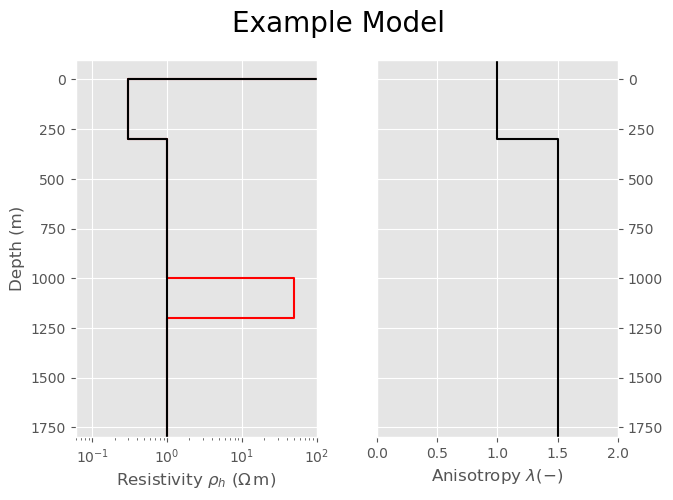

In [4]:
pdepth = np.repeat(np.r_[-100, depth], 2)
pdepth[:-1] = pdepth[1:]
pdepth[-1] = 2*depth[-1]
pres = np.repeat(res, 2)
presBG = np.repeat(resBG, 2)
pani = np.repeat(aniso, 2)

# Create figure
fig = plt.figure(figsize=(7,5), facecolor='w')
fig.subplots_adjust(wspace=.25, hspace=.4)
plt.suptitle(name, fontsize=20)

# Plot Resistivities
ax1 = plt.subplot(1, 2, 1)
plt.plot(pres, pdepth, 'r')
plt.plot(presBG, pdepth, 'k')
plt.xscale('log')
plt.xlim([.2*np.array(res).min(), 2*np.array(res)[1:].max()])
plt.ylim([1.5*depth[-1], -100])
plt.ylabel('Depth (m)')
plt.xlabel(r'Resistivity $\rho_h\ (\Omega\,\rm{m})$')

# Plot anisotropies
ax2 = plt.subplot(1, 2, 2)
plt.plot(pani, pdepth, 'k')
plt.xlim([0, 2])
plt.ylim([1.5*depth[-1], -100])
plt.xlabel(r'Anisotropy $\lambda (-)$')
ax2.yaxis.tick_right()

plt.show()

## 1. Frequency response for f = 1 Hz

### Calculate

In [5]:
inpdat = {'src': [0, 0, zsrc], 'rec': [fx, fy, zrec], 'depth': depth,
          'freqtime': 1, 'aniso': aniso, 'ab': ab, 'verb': verb}

fEM = epm.dipole(**inpdat, res=res)
fEMBG = epm.dipole(**inpdat, res=resBG)

# Add amp & pha attributes
fEM = epm.EMArray(fEM)
fEMBG = epm.EMArray(fEMBG)

### Plot

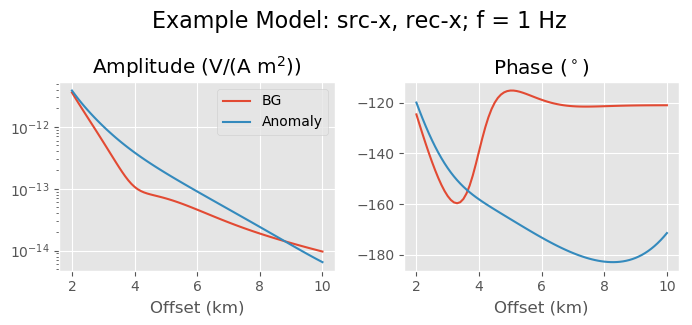

In [6]:
fig = plt.figure(figsize=(8,6), facecolor='w')
fig.subplots_adjust(wspace=.25, hspace=.4)
fig.suptitle(name+': src-x, rec-x; f = 1 Hz', fontsize=16, y=1)

# Plot Amplitude
ax1 = plt.subplot(2, 2, 1)
plt.semilogy(fx/1000, fEMBG.amp, label='BG')
plt.semilogy(fx/1000, fEM.amp, label='Anomaly')
plt.legend(loc='best')
plt.title(r'Amplitude (V/(A m$^2$))')
plt.xlabel('Offset (km)')

# Plot Phase
ax2 = plt.subplot(2, 2, 2)
plt.title(r'Phase ($^\circ$)')
plt.plot(fx/1000, fEMBG.pha, label='BG')
plt.plot(fx/1000, fEM.pha, label='Anomaly')
plt.xlabel('Offset (km)')

plt.show()

## 2. Crossplot

### Calculate

In [7]:
# Calculate responses
freq  = np.logspace(-1.5, .5, 33)  # 33 frequencies from -1.5 to 0.5 (logspace)
inpdat = {'src': [0, 0, zsrc], 'rec': [fx, fy, zrec], 'depth': depth,
          'freqtime': freq, 'aniso': aniso, 'ab': ab, 'verb': verb}

xfEM = epm.dipole(**inpdat, res=res)
xfEMBG = epm.dipole(**inpdat, res=resBG)

### Plot

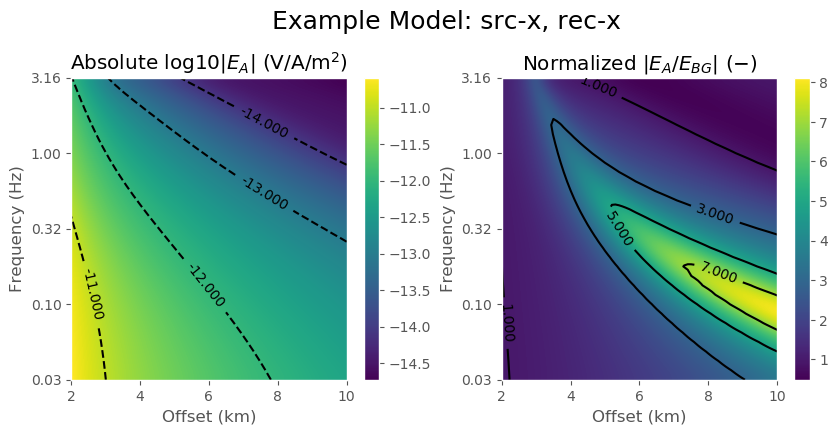

In [8]:
lfreq = np.log10(freq)

# Create figure
fig = plt.figure(figsize=(10,4), facecolor='w')
fig.subplots_adjust(wspace=.25, hspace=.4)

# Plot absolute (amplitude) in log10
ax1 = plt.subplot(1, 2, 2)
plt.title(r'Normalized $|E_A/E_{BG}|\ (-)$')
plt.imshow(np.abs(xfEM/xfEMBG), interpolation='bicubic', extent=[fx[0]/1000, fx[-1]/1000, lfreq[0], lfreq[-1]], origin='lower', aspect='auto')
plt.grid(False)
plt.colorbar()
CS = plt.contour(fx/1000, lfreq, np.abs(xfEM/xfEMBG), [1, 3, 5, 7], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.ylim([lfreq[0], lfreq[-1]])
plt.xlim([fx[0]/1000, fx[-1]/1000])
plt.xlabel('Offset (km)')
plt.ylabel('Frequency (Hz)')
plt.yticks([-1.5, -1, -.5, 0, .5], ('0.03', '0.10', '0.32', '1.00', '3.16'))

# Plot normalized
ax2 = plt.subplot(1, 2, 1)
plt.title(r'Absolute log10$|E_A|$ (V/A/m$^2$)')
plt.imshow(np.log10(np.abs(xfEM)), interpolation='bicubic', extent=[fx[0]/1000, fx[-1]/1000, lfreq[0], lfreq[-1]], origin='lower', aspect='auto')
plt.grid(False)
plt.colorbar()
CS = plt.contour(fx/1000, lfreq, np.log10(np.abs(xfEM)), [-14, -13, -12, -11], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.ylim([lfreq[0], lfreq[-1]])
plt.xlim([fx[0]/1000, fx[-1]/1000])
plt.xlabel('Offset (km)')
plt.ylabel('Frequency (Hz)')
plt.yticks([-1.5, -1, -.5, 0, .5], ('0.03', '0.10', '0.32', '1.00', '3.16'))

fig.suptitle(name+': src-x, rec-x', fontsize=18, y=1.05)

plt.show()

In [9]:
epm.versions('HTML')